In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv("~/Downloads/store.csv")

In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df = df.set_index('date')

In [5]:
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [6]:
buf = df[(df.store==1)&(df.item==1)].copy()
buf.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


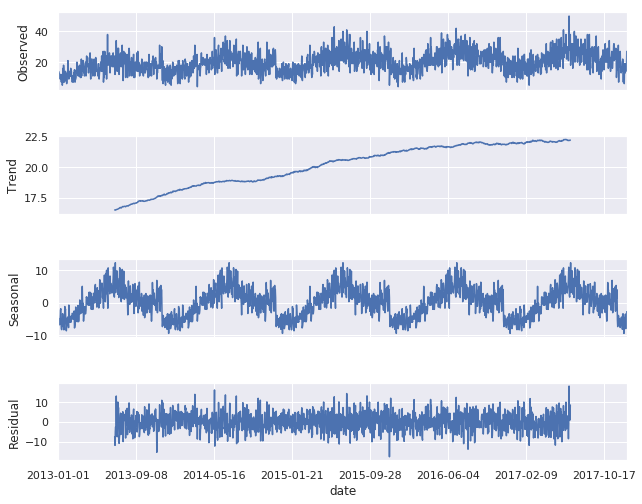

In [8]:
res = sm.tsa.seasonal_decompose(buf.sales.dropna(), freq=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(10)
plt.show()

In [9]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(buf['sales'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.07610688992415375


In [10]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(buf['sales'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:1.2109276320428997e-23


In [7]:
tra = buf['sales'].dropna()
tra_log = np.log(buf['sales'])

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


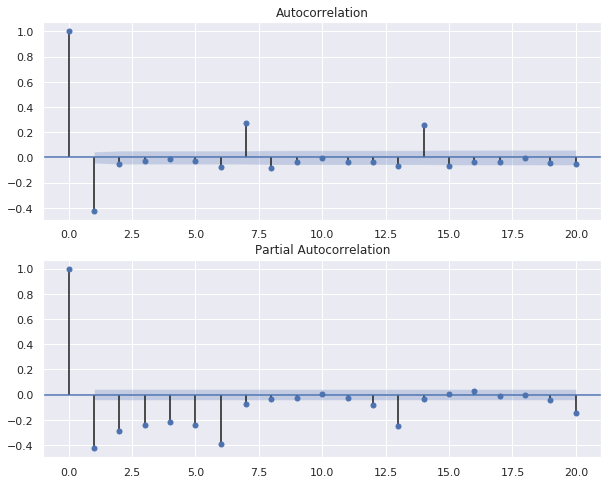

In [8]:
#we use tra.diff()(differenced data), because this time series is unit root process.
fig,ax = plt.subplots(2,1,figsize=(10,8))

fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=20, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=20, ax=ax[1])

plt.show()

In [13]:
resDiff = sm.tsa.arma_order_select_ic(tra, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packa

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packag

ARMA(p,q) = (7, 7) is the best.


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [14]:
arima = sm.tsa.statespace.SARIMAX(tra,order=(7,1,7),freq='D',seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1826
Model:               SARIMAX(7, 1, 7)   Log Likelihood               -5396.199
Date:                Sat, 07 Dec 2019   AIC                          10822.397
Time:                        16:14:51   BIC                          10904.972
Sample:                    01-01-2013   HQIC                         10852.864
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9106      0.030    -30.117      0.000      -0.970      -0.851
ar.L2         -0.9126      0.030    -30.314      0.000      -0.972      -0.854
ar.L3         -0.9118      0.030    -30.257      0.000      -0.971      -0.853
ar.L4         -0.9120      0.030    -30.179      0.000      -0.971      -0.853
ar.L5         -0.9129      0.030    -30.451      0.000      -0.972      -0.854
ar.L6         -0.9113      0.030    -30.049      0.000      -0.971      -0.852
ar.L7          0.0874      0.030      2.916      0.004       0.029       0.146
ma.L1          0.0615      0.018      3.501      0.000       0.027       0.096
ma.L2          0.1130      0.015      7.452      0.000       0.083       0.143
ma.L3          0.0824      0.019      4.261      0.000       0.044       0.120
ma.L4          0.0873      0.020      4.367      0.000       0.048       0.126
ma.L5          0.0970      0.016      6.187      0.000       0.066       0.128
ma.L6          0.0795      0.017      4.816      0.000       0.047       0.112
ma.L7         -0.8909      0.018    -49.083      0.000      -0.926      -0.855
sigma2        23.8817      0.914     26.129      0.000      22.090      25.673
===================================================================================
Ljung-Box (Q):                       49.87   Jarque-Bera (JB):                13.58
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
SSE = np.sum(arima.resid**2)
SSE

40346.63812836669

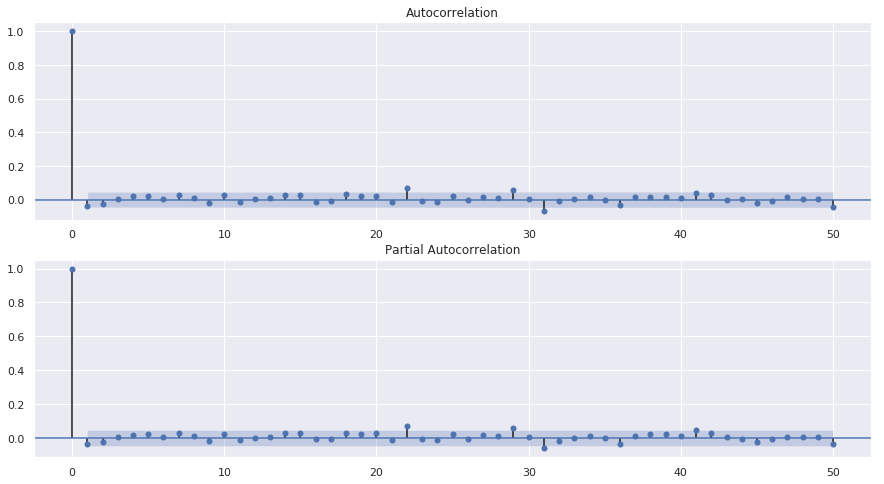

In [20]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [15]:
sarima = sm.tsa.statespace.SARIMAX(tra, freq='D', enforce_invertibility=False,
                                   order=(0, 1, 1), seasonal_order=(1, 1, 1, 7))
results = sarima.fit()
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                             sales   No. Observations:                 1826
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -5394.870
Date:                           Sat, 07 Dec 2019   AIC                          10797.740
Time:                                   16:15:00   BIC                          10819.762
Sample:                               01-01-2013   HQIC                         10805.865
                                    - 12-31-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8952      0.011    -80.737      0.000      -0.917      -0.873
ar.S.L7        0.0375      0.023      1.596

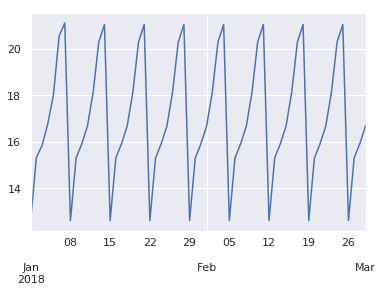

In [16]:
tra['fcst'] = results.predict(start='2018-01-01', end='2018-3-01', dynamic=True)
tra['fcst'].loc['2018-01-01':].plot()

In [16]:
tra['fcst']

2018-01-01    12.436938
2018-01-02    15.124402
2018-01-03    15.749181
2018-01-04    16.828241
2018-01-05    17.950061
2018-01-06    20.464772
2018-01-07    21.070541
2018-01-08    12.574100
2018-01-09    15.263641
2018-01-10    15.872363
2018-01-11    16.645373
2018-01-12    18.088051
2018-01-13    20.255617
2018-01-14    21.004956
2018-01-15    12.577463
2018-01-16    15.267603
2018-01-17    15.879069
2018-01-18    16.639945
2018-01-19    18.093772
2018-01-20    20.249109
2018-01-21    21.003633
2018-01-22    12.578614
2018-01-23    15.268730
2018-01-24    15.880300
2018-01-25    16.640749
2018-01-26    18.094972
2018-01-27    20.249875
2018-01-28    21.004582
2018-01-29    12.579652
2018-01-30    15.269766
2018-01-31    15.881340
2018-02-01    16.641773
2018-02-02    18.096011
2018-02-03    20.250898
2018-02-04    21.005612
2018-02-05    12.580684
2018-02-06    15.270799
2018-02-07    15.882373
2018-02-08    16.642806
2018-02-09    18.097044
2018-02-10    20.251930
2018-02-11    21